# Mall Customer Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.drop('CustomerID',axis=1,inplace=True)

Data is already cleaned. Hence no need of EDA

In [6]:
data['Genre'] = data['Genre'].map({'Female':1,'Male':0})

In [7]:
data = data.rename(columns={'Spending Score (1-100)':'Score','Genre':'Gender','Annual Income (k$)':'Annual Income'})

In [8]:
data.head()

,Gender,Age,Annual Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


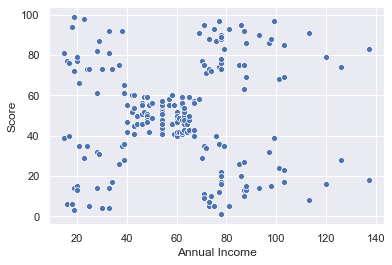

In [9]:
sns.scatterplot(data['Annual Income'],data.Score);

## Elbow Method

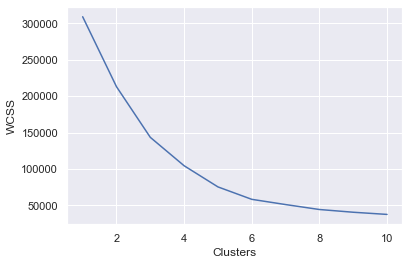

In [10]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_instance = kmeans.inertia_
    wcss.append(wcss_instance)

a = range(1,11)

plt.plot(a,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

5 Cluster seem to be appropriate for our data

## Clustering with 5 clusters

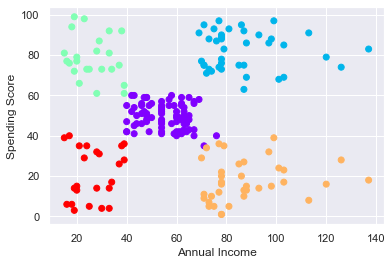

In [11]:
kmeans = KMeans(5)
kmeans.fit(data)

data['Cluster'] = kmeans.labels_

plt.scatter(data['Annual Income'],data['Score'],c=data['Cluster'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Hence, we have successfully clustered customers spending at the mall.